In [1]:
#import dependencies
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as st
from scipy.stats import linregress

from datetime import datetime as dt

In [2]:
#Database information
SQL_USERNAME = "postgres"
SQL_PASSWORD = "postgres"
SQL_IP = "localhost"
PORT = 5432
DATABASE = "Project_02_Group_06"

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# test query
# Find campaigns where subcategory = drama

query = """SELECT 
                * 
          FROM 
              campaign
          WHERE
              subcategory = 'drama';"""

test_df = pd.read_sql(text(query), con=engine)
test_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category,subcategory,category_id,subcategory_id,last_updated
0,2340,3064,Green Ltd,Monitored empowering installation,5200,13838,successful,220,US,USD,2020-07-11 05:00:00,2021-08-02 05:00:00,False,False,film & video,drama,cat5,subcat7,2024-07-16 19:38:06.512522
1,1950,1299,Kim Ltd,Assimilated hybrid intranet,6300,5629,failed,55,US,USD,2020-11-14 06:00:00,2021-04-09 05:00:00,False,False,film & video,drama,cat5,subcat7,2024-07-16 19:38:06.512522
2,118,2900,"Reeves, Thompson and Richardson",Proactive composite alliance,131800,147936,successful,1396,US,USD,2020-04-12 05:00:00,2021-04-09 05:00:00,False,False,film & video,drama,cat5,subcat7,2024-07-16 19:38:06.512522
3,2871,4994,Mitchell and Sons,Synergized intangible challenge,125500,188628,successful,1965,DK,DKK,2021-03-16 05:00:00,2021-03-25 05:00:00,False,True,film & video,drama,cat5,subcat7,2024-07-16 19:38:06.512522
4,2309,3070,Smith-Jones,Reverse-engineered static concept,8800,12356,successful,209,US,USD,2021-10-14 05:00:00,2021-12-24 06:00:00,False,False,film & video,drama,cat5,subcat7,2024-07-16 19:38:06.512522


In [5]:
test_df.describe()

,cf_id,contact_id,goal,pledged,backers_count,launch_date,end_date,last_updated
count,37.000000,37.000000,37.000000,37.000000,37.000000,37,37,37
mean,1337.000000,3697.108108,37710.810811,32668.783784,438.243243,2021-01-05 23:30:48.648648704,2021-07-10 22:12:58.378378496,2024-07-16 19:38:06.512521984
min,47.000000,1299.000000,700.000000,1022.000000,31.000000,2020-02-01 06:00:00,2021-02-08 06:00:00,2024-07-16 19:38:06.512522
25%,514.000000,2368.000000,5100.000000,6245.000000,82.000000,2020-08-26 05:00:00,2021-04-09 05:00:00,2024-07-16 19:38:06.512521984
50%,1159.000000,3528.000000,7800.000000,11579.000000,172.000000,2021-02-19 06:00:00,2021-06-25 05:00:00,2024-07-16 19:38:06.512521984
75%,2099.000000,4994.000000,70200.000000,23159.000000,460.000000,2021-04-06 05:00:00,2021-09-26 05:00:00,2024-07-16 19:38:06.512521984
max,3042.000000,6207.000000,161900.000000,188628.000000,2080.000000,2021-12-23 06:00:00,2022-02-02 06:00:00,2024-07-16 19:38:06.512522
std,959.450711,1472.634408,50645.290358,49913.957392,603.792754,NaN,NaN,NaN


In [6]:
# Find the number of campaigns by category

query = """SELECT 
                count(*) as campaign_count, category
          FROM 
              campaign 
          GROUP BY
              category
          ORDER BY
              campaign_count;"""

df = pd.read_sql(text(query), con=engine)
df

,campaign_count,category
0,4,journalism
1,42,photography
2,46,food
3,48,games
4,67,publishing
5,96,technology
6,175,music
7,178,film & video
8,344,theater


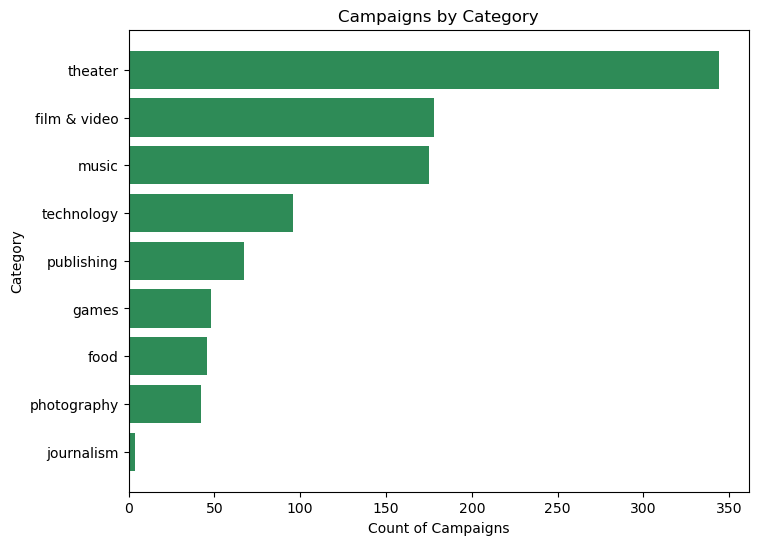

In [7]:
plt.figure(figsize = (8,6))

plt.barh(df.category, df.campaign_count, color = "seagreen")

plt.xlabel("Count of Campaigns")
plt.ylabel("Category")
plt.title("Campaigns by Category")
plt.savefig("Q1Barchart.png")
plt.show()

In [8]:
# Find a breakdown of backercounts and number of campaigns for each category

query = """SELECT 
                category, count(*) as campaign_count, sum(backers_count) as total_backers
          FROM 
              campaign 
          GROUP BY
              category
          ORDER BY
              total_backers;"""

df = pd.read_sql(text(query), con=engine)
df

,category,campaign_count,total_backers
0,journalism,4,1194
1,photography,42,24044
2,food,46,28846
3,games,48,37662
4,publishing,67,52619
5,technology,96,67494
6,film & video,178,121875
7,music,175,129002
8,theater,344,264269


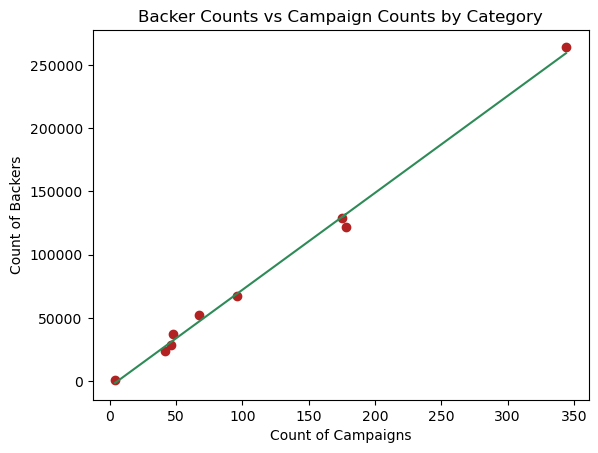

The average backers per campaign across all campaigns is 766.4844288465122
With an r-value of 0.9979515265460234, the average generally represents each category well


In [9]:
correlation = st.pearsonr(df.campaign_count, df.total_backers)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(df.campaign_count, df.total_backers)
regress_values = df.campaign_count * slope + intercept

plt.scatter(df.campaign_count, df.total_backers, color = "firebrick")

plt.plot(df.campaign_count, regress_values, color = "seagreen")
    
plt.xlabel("Count of Campaigns")
plt.ylabel("Count of Backers")
plt.title("Backer Counts vs Campaign Counts by Category")

plt.grid(False)
plt.savefig("Q2scatter.png")
plt.show()

print(f"The average backers per campaign across all campaigns is {slope}")
print(f"With an r-value of {rvalue}, the average generally represents each category well")

In [10]:
# Find the number of successes and failures by country

query1 = """SELECT 
                country, count(*) as successful_campaigns
          FROM 
              campaign 
          WHERE
              outcome = 'successful'
          GROUP BY
              country
          ORDER BY
              successful_campaigns;"""

df_successful = pd.read_sql(text(query1), con=engine)
df_successful

,country,successful_campaigns
0,CH,12
1,DK,17
2,CA,22
3,AU,24
4,IT,26
5,GB,28
6,US,436


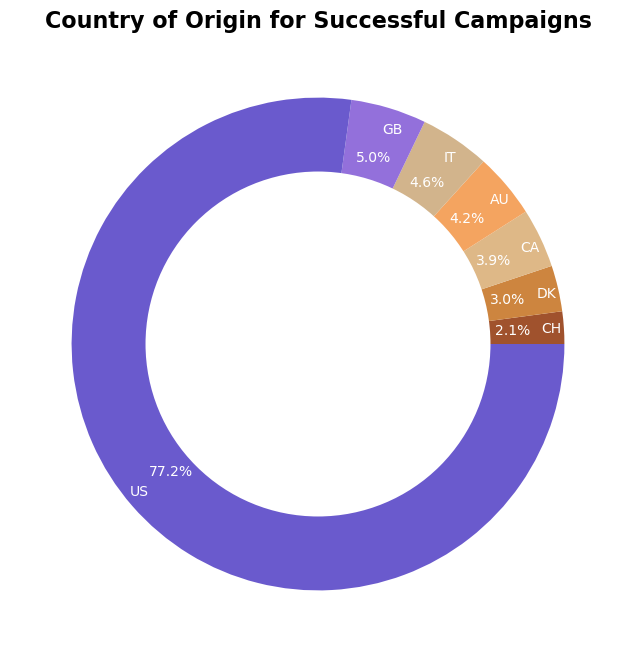

In [11]:
# Create a donut chart for the breakdown of country of origin for successful campaigns
plt.figure(figsize =(8,8))

pielabels = df_successful.country
piedata= df_successful.successful_campaigns

#ChatGPT Selected the colors
colors = ['#A0522D', '#CD853F', '#DEB887', '#F4A460', '#D2B48C', '#9370DB', '#6A5ACD']

plt.pie(piedata, labels=pielabels, colors = colors, labeldistance = .91,autopct="%1.1f%%", pctdistance=0.79,
     textprops=dict(color="w"))

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(center_circle)


plt.title("Country of Origin for Successful Campaigns", fontweight = "bold", fontsize = 16)

plt.savefig("Q3Donut.png")
plt.show()
